In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/Dolma_freq.csv")

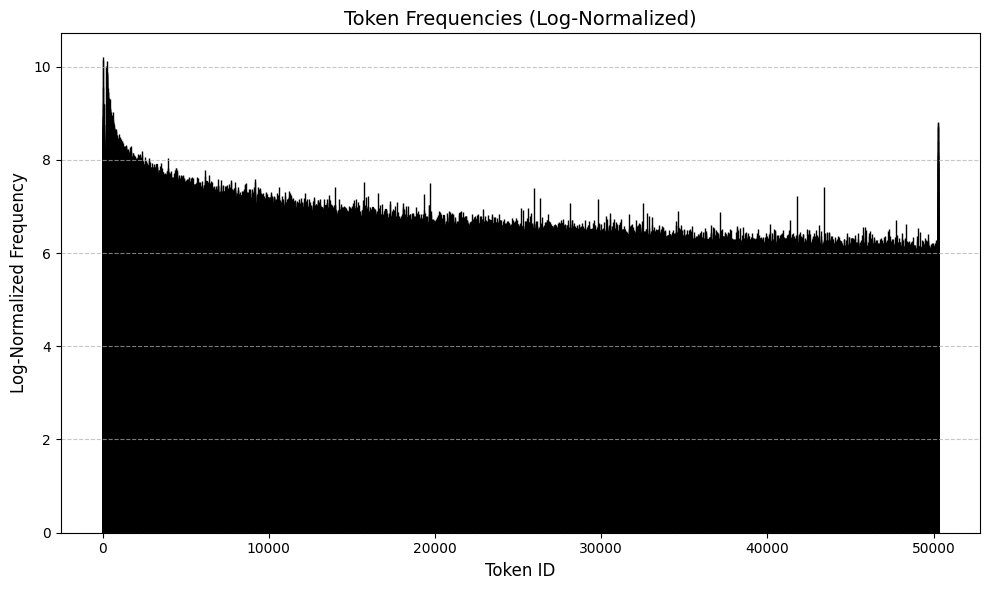

In [4]:
# Log-normalize the frequencies
df['log_frequency'] = np.log10(df['frequency'])

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(df['token_id'], df['log_frequency'], color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Token ID', fontsize=12)
plt.ylabel('Log-Normalized Frequency', fontsize=12)
plt.title('Token Frequencies (Log-Normalized)', fontsize=14)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

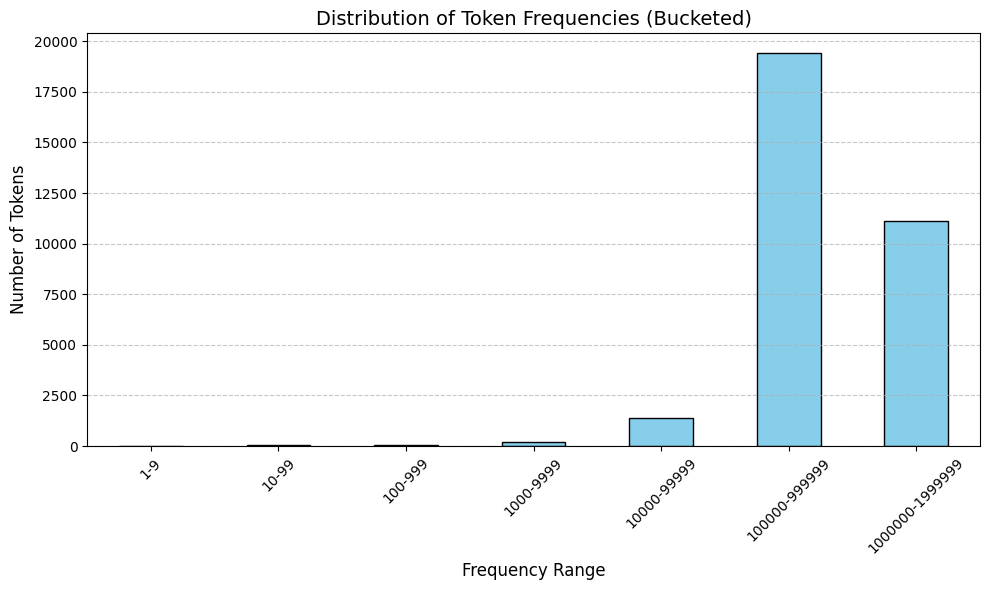

In [6]:

# Define frequency buckets by orders of magnitude
bins = [1, 10, 100, 1_000, 10_000, 100_000, 1_000_000, 2_000_000]
df['frequency_bucket'] = pd.cut(df['frequency'], bins=bins, labels=[f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)])

# Count the number of tokens in each bucket
bucket_counts = df['frequency_bucket'].value_counts(sort=False)

# Plot the histogram
plt.figure(figsize=(10, 6))
bucket_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Frequency Range', fontsize=12)
plt.ylabel('Number of Tokens', fontsize=12)
plt.title('Distribution of Token Frequencies (Bucketed)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
# Find the row with the maximum frequency
max_frequency_row = df.loc[df['frequency'].idxmax()]

# Extract the token_id and frequency
highest_token_id = max_frequency_row['token_id']
highest_frequency = max_frequency_row['frequency']

print(f"The token with the highest frequency is Token ID {highest_token_id} with a frequency of {highest_frequency}.")


The token with the highest frequency is Token ID 15 with a frequency of 15936997733.


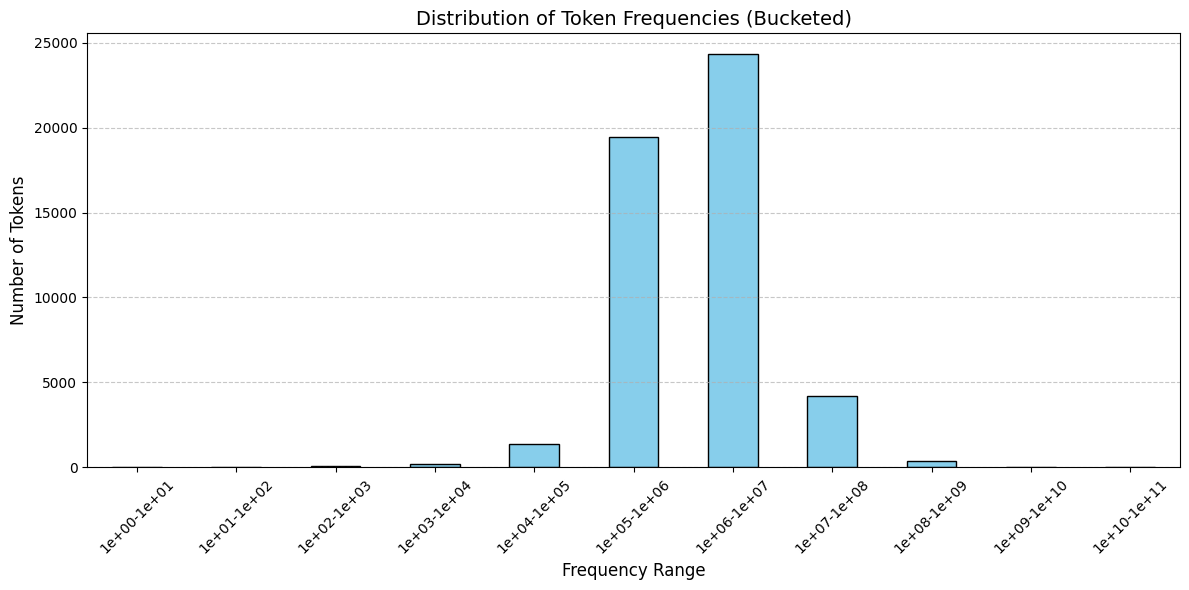

In [8]:

# Adjust the maximum frequency in your dataset
df.loc[0, 'frequency'] = 15936997733  # Simulate the highest frequency

# Define dynamic bins based on the highest frequency
max_frequency = df['frequency'].max()
bin_edges = [10**i for i in range(0, int(np.log10(max_frequency)) + 2)]

# Assign tokens to frequency buckets
df['frequency_bucket'] = pd.cut(df['frequency'], bins=bin_edges, labels=[f"{bin_edges[i]:.0e}-{bin_edges[i+1]:.0e}" for i in range(len(bin_edges) - 1)])

# Count the number of tokens in each bucket
bucket_counts = df['frequency_bucket'].value_counts(sort=False)

# Plot the histogram
plt.figure(figsize=(12, 6))
bucket_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Frequency Range', fontsize=12)
plt.ylabel('Number of Tokens', fontsize=12)
plt.title('Distribution of Token Frequencies (Bucketed)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

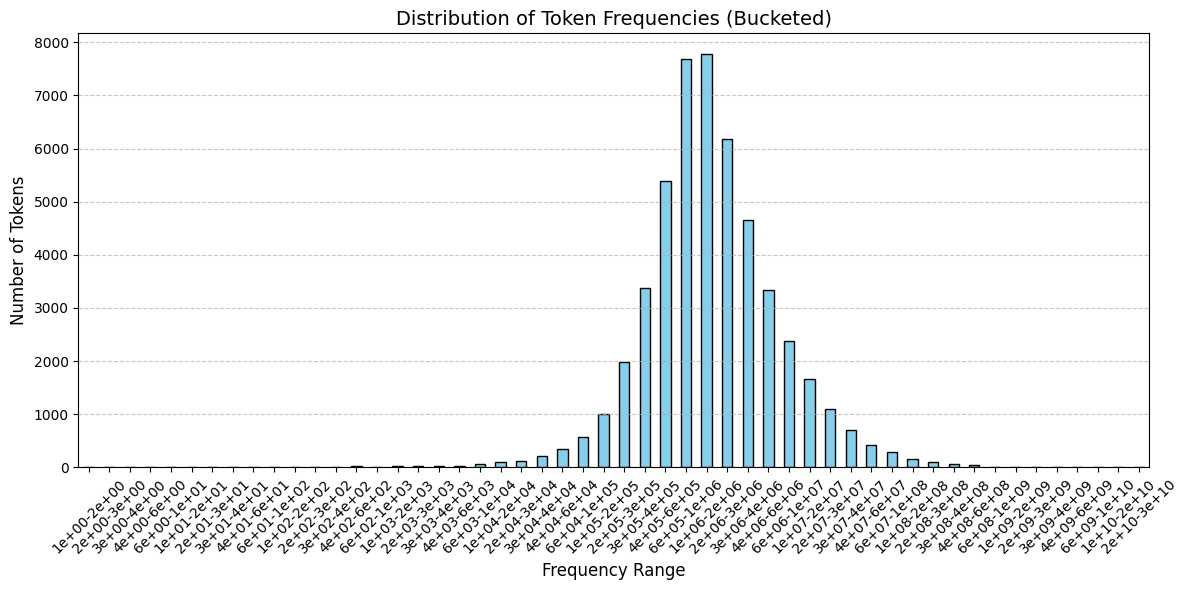

In [4]:

# Adjust the maximum frequency in your dataset
df.loc[0, 'frequency'] = 15936997733  # Simulate the highest frequency
# Define smaller dynamic bins based on the highest frequency
bin_resolution = 0.2  # Smaller bucket size (logarithmic step)
max_frequency = df['frequency'].max()
bin_edges = [10**i for i in np.arange(0, np.log10(max_frequency) + bin_resolution, bin_resolution)]

# Assign tokens to frequency buckets
df['frequency_bucket'] = pd.cut(df['frequency'], bins=bin_edges, labels=[f"{bin_edges[i]:.0e}-{bin_edges[i+1]:.0e}" for i in range(len(bin_edges) - 1)])

# Count the number of tokens in each bucket
bucket_counts = df['frequency_bucket'].value_counts(sort=False)

# Plot the histogram
plt.figure(figsize=(12, 6))
bucket_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Frequency Range', fontsize=12)
plt.ylabel('Number of Tokens', fontsize=12)
plt.title('Distribution of Token Frequencies (Bucketed)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

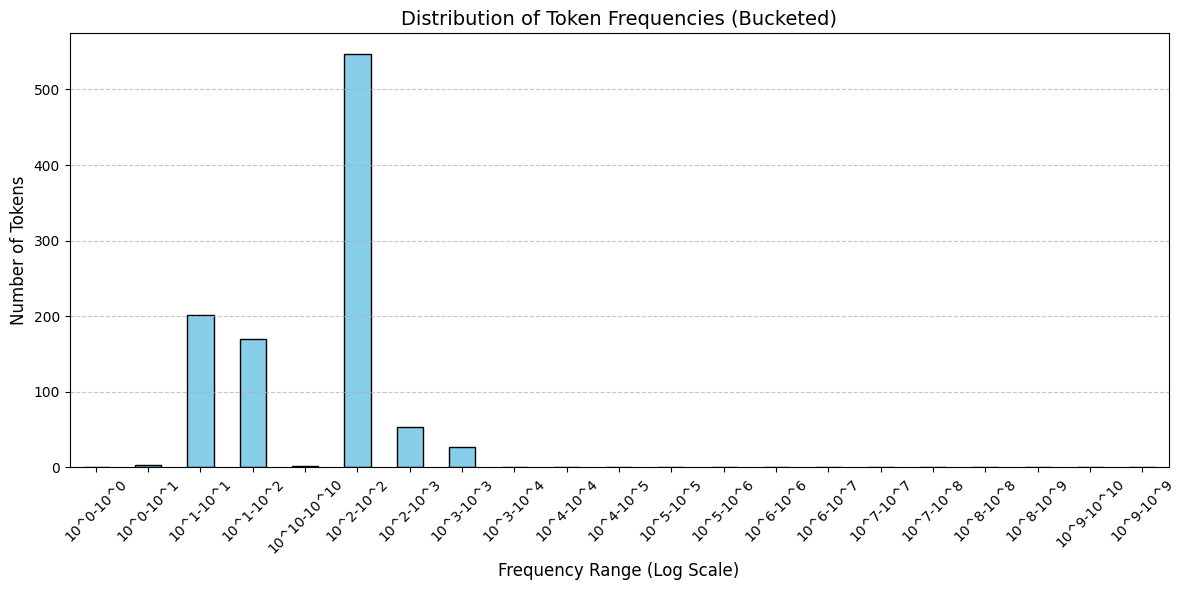

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate dataset
df = pd.DataFrame({'frequency': np.random.lognormal(mean=5, sigma=1, size=1000)})

# Adjust the maximum frequency in your dataset
df.loc[0, 'frequency'] = 15936997733  # Simulate the highest frequency

# Define smaller dynamic bins based on the highest frequency
bin_resolution = 0.2  # Logarithmic step
max_frequency = df['frequency'].max()
bin_edges = sorted(set(10**i for i in np.arange(0, np.log10(max_frequency) + bin_resolution, bin_resolution)))

# Ensure labels are unique
labels = [f"10^{int(np.log10(bin_edges[i]))}-10^{int(np.log10(bin_edges[i+1]))}" for i in range(len(bin_edges) - 1)]

# Assign tokens to frequency buckets
df['frequency_bucket'] = pd.cut(df['frequency'], bins=bin_edges, labels=labels, include_lowest=True, ordered=False)

# Count the number of tokens in each bucket
bucket_counts = df['frequency_bucket'].value_counts(sort=False)

# Plot the histogram
plt.figure(figsize=(12, 6))
bucket_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Frequency Range (Log Scale)', fontsize=12)
plt.ylabel('Number of Tokens', fontsize=12)
plt.title('Distribution of Token Frequencies (Bucketed)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



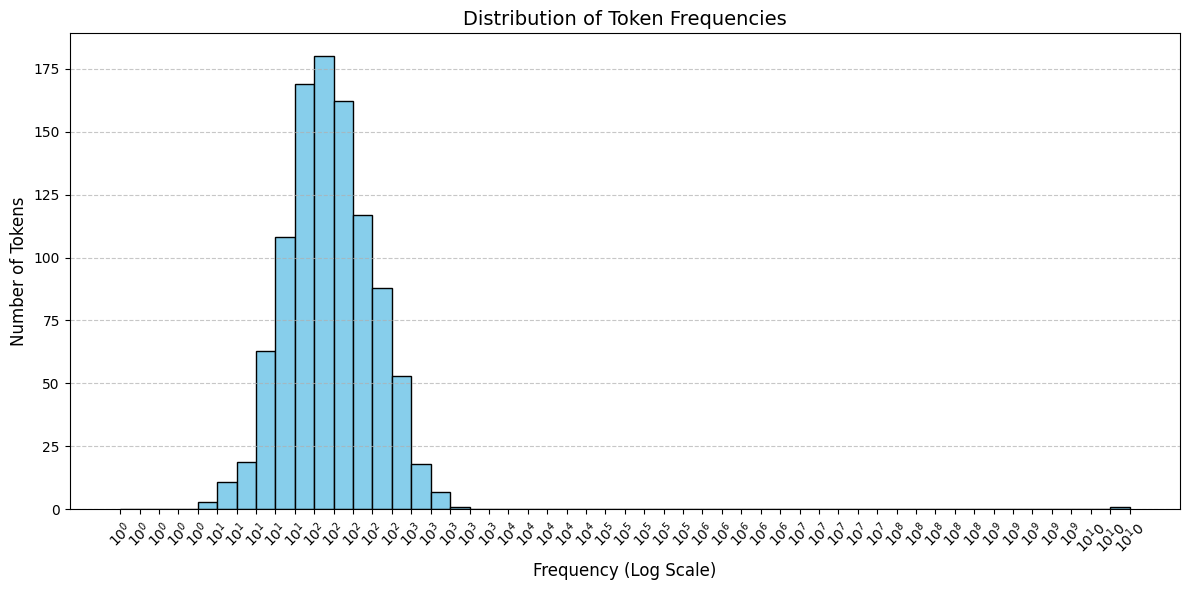

In [5]:
# Option 2
plt.figure(figsize=(12, 6))
plt.hist(df['frequency'], bins=bin_edges, color='skyblue', edgecolor='black')

# Log scale for x-axis
plt.xscale('log')

# Format ticks in base 10
plt.xticks(bin_edges, labels=[f"$10^{int(np.log10(b))}$" for b in bin_edges], rotation=45)

# Labels and title
plt.xlabel('Frequency (Log Scale)', fontsize=12)
plt.ylabel('Number of Tokens', fontsize=12)
plt.title('Distribution of Token Frequencies', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


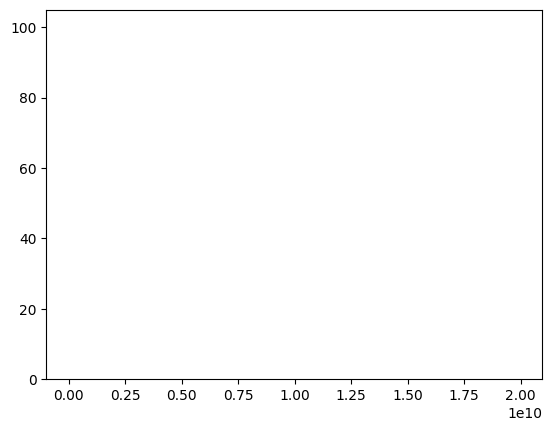

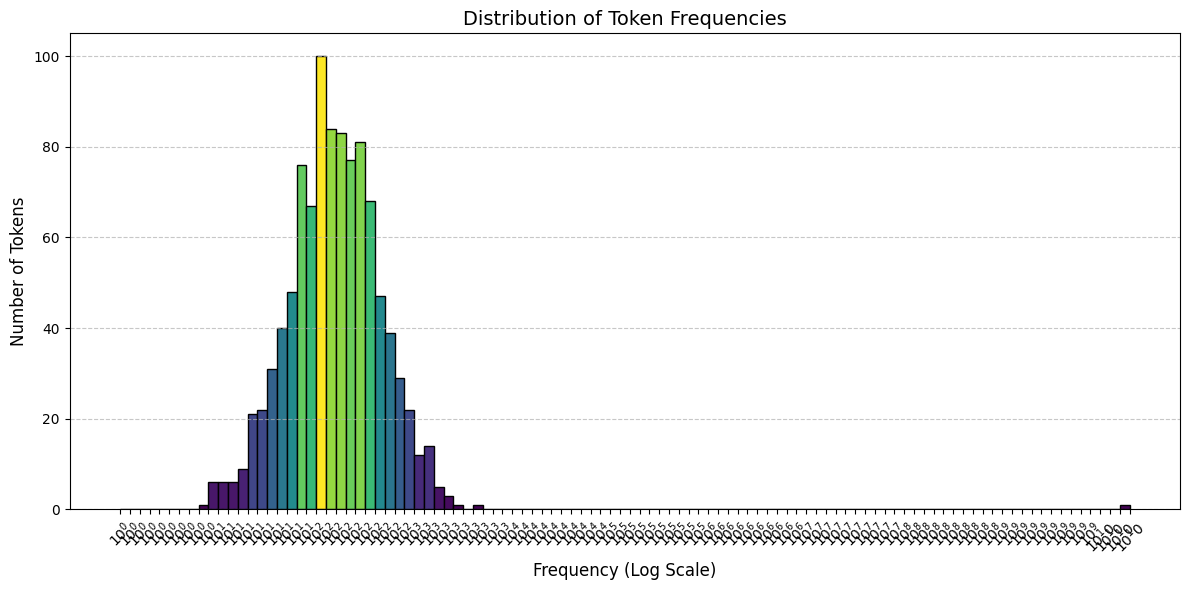

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Simulate dataset
df = pd.DataFrame({'frequency': np.random.lognormal(mean=5, sigma=1, size=1000)})

# Adjust the maximum frequency in your dataset
df.loc[0, 'frequency'] = 15936997733  # Simulate the highest frequency

# Define smaller dynamic bins with higher resolution
bin_resolution = 0.1  # More granular step for smaller intervals
max_frequency = df['frequency'].max()
bin_edges = sorted(set(10**i for i in np.arange(0, np.log10(max_frequency) + bin_resolution, bin_resolution)))

# Create histogram data
hist_values, bins, _ = plt.hist(df['frequency'], bins=bin_edges, alpha=0)  # Compute histogram without plotting

# Normalize values for color mapping
norm = mcolors.Normalize(vmin=min(hist_values), vmax=max(hist_values))
colors = plt.cm.viridis(norm(hist_values))  # Choose a colormap

# Plot histogram with colored bars
plt.figure(figsize=(12, 6))
for i in range(len(bins) - 1):
    plt.bar(bins[i], hist_values[i], width=(bins[i+1] - bins[i]), color=colors[i], edgecolor='black', align='edge')

# Log scale for x-axis
plt.xscale('log')

# Format ticks in base 10
plt.xticks(bin_edges, labels=[f"$10^{int(np.log10(b))}$" for b in bin_edges], rotation=45)

# Labels and title
plt.xlabel('Frequency (Log Scale)', fontsize=12)
plt.ylabel('Number of Tokens', fontsize=12)
plt.title('Distribution of Token Frequencies', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add color bar
#sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
#plt.colorbar(sm, label="Token Count", orientation="vertical")

plt.tight_layout()
plt.show()


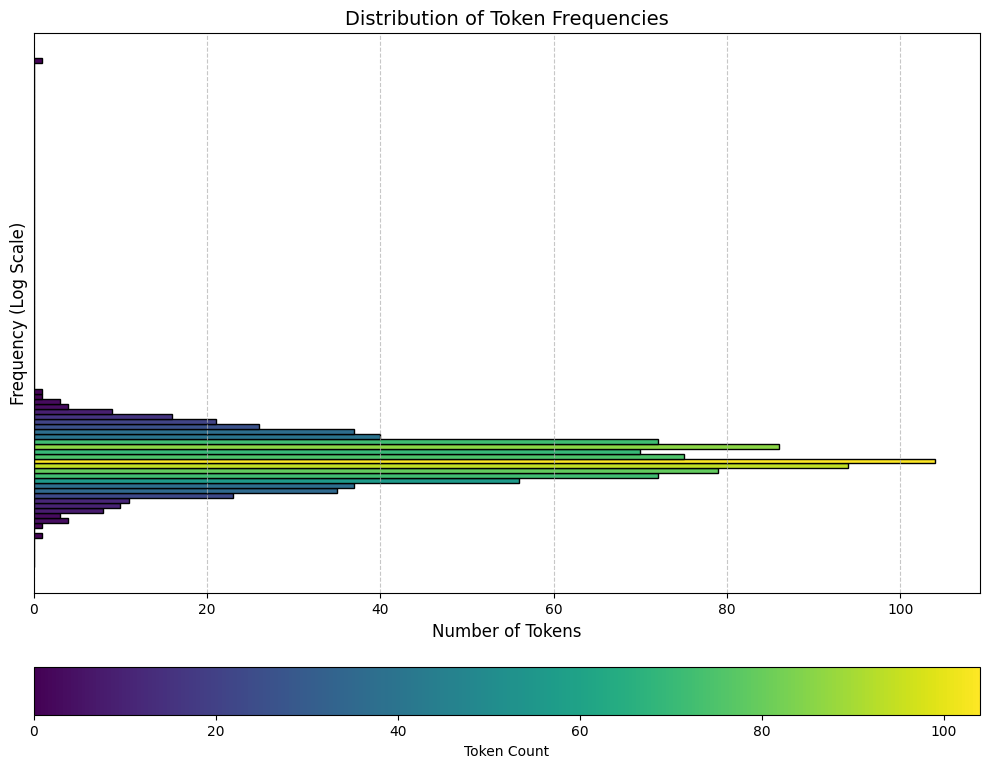

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Simulate dataset
df = pd.DataFrame({'frequency': np.random.lognormal(mean=5, sigma=1, size=1000)})

# Adjust the maximum frequency in your dataset
df.loc[0, 'frequency'] = 15936997733  # Simulate the highest frequency

# Define smaller dynamic bins with higher resolution
bin_resolution = 0.1  # More granular step for smaller intervals
max_frequency = df['frequency'].max()
bin_edges = sorted(set(10**i for i in np.arange(0, np.log10(max_frequency) + bin_resolution, bin_resolution)))

# Compute histogram data
hist_values, bins = np.histogram(df['frequency'], bins=bin_edges)

# Normalize values for color mapping
norm = mcolors.Normalize(vmin=min(hist_values), vmax=max(hist_values))
cmap = plt.cm.viridis  # Choose a colormap
colors = cmap(norm(hist_values))  # Map values to colors

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot horizontal bars
for i in range(len(bins) - 1):
    ax.barh(y=(bins[i] + bins[i+1]) / 2,  # Position bar in the middle of the bin
            width=hist_values[i],  # Number of tokens
            height=(bins[i+1] - bins[i]),  # Log scale bin size
            color=colors[i], edgecolor='black')

# Log scale for y-axis
ax.set_yscale('log')

# Remove y-axis labels for clarity
ax.set_yticks([])

# Labels and title
ax.set_xlabel('Number of Tokens', fontsize=12)
ax.set_ylabel('Frequency (Log Scale)', fontsize=12)
ax.set_title('Distribution of Token Frequencies', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Create a ScalarMappable object for the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar

# Add color bar
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", pad=0.1)
cbar.set_label("Token Count")

plt.tight_layout()
plt.show()



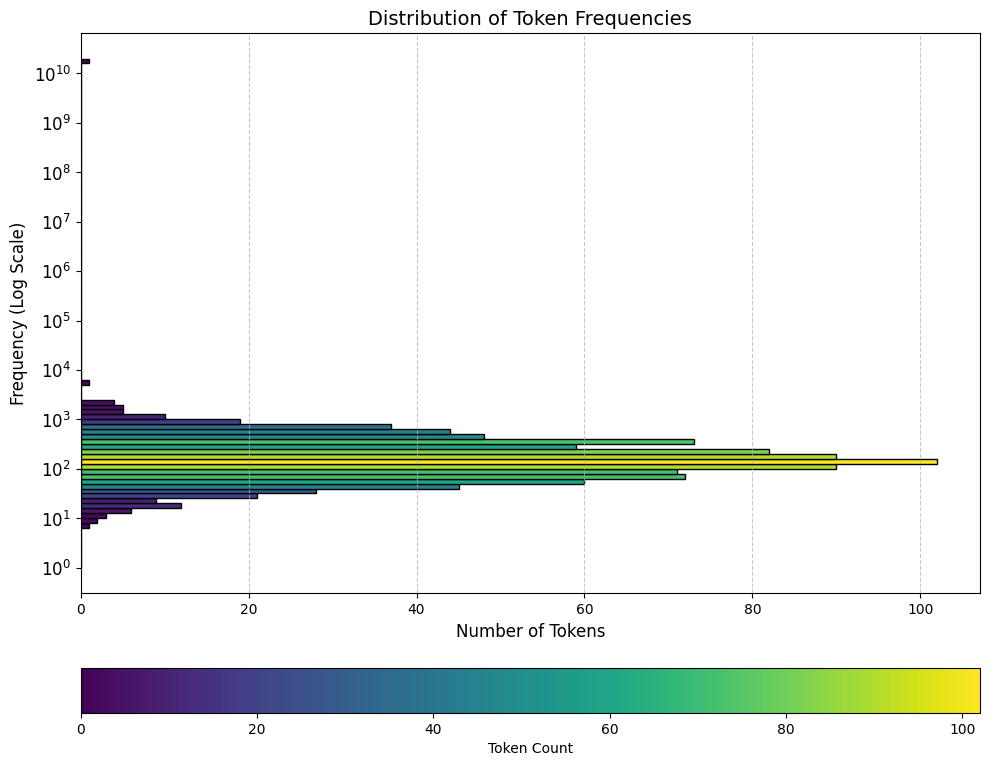

<Figure size 640x480 with 0 Axes>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Simulate dataset
df = pd.DataFrame({'frequency': np.random.lognormal(mean=5, sigma=1, size=1000)})

# Adjust the maximum frequency in your dataset
df.loc[0, 'frequency'] = 15936997733  # Simulate the highest frequency

# Define smaller dynamic bins with higher resolution
bin_resolution = 0.1  # More granular step for smaller intervals
max_frequency = df['frequency'].max()
bin_edges = sorted(set(10**i for i in np.arange(0, np.log10(max_frequency) + bin_resolution, bin_resolution)))

# Compute histogram data
hist_values, bins = np.histogram(df['frequency'], bins=bin_edges)

# Normalize values for color mapping
norm = mcolors.Normalize(vmin=min(hist_values), vmax=max(hist_values))
cmap = plt.cm.viridis  # Choose a colormap
colors = cmap(norm(hist_values))  # Map values to colors

# Get unique multiples of 10 for y-axis labels
y_tick_positions = [b for b in bin_edges if np.log10(b).is_integer()]  # Only exact powers of 10
y_tick_labels = [rf"$10^{{{int(np.log10(b))}}}$" for b in y_tick_positions]  # Proper LaTeX formatting

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot horizontal bars
for i in range(len(bins) - 1):
    ax.barh(y=(bins[i] + bins[i+1]) / 2,  # Position bar in the middle of the bin
            width=hist_values[i],  # Number of tokens
            height=(bins[i+1] - bins[i]),  # Log scale bin size
            color=colors[i], edgecolor='black')

# Log scale for y-axis
ax.set_yscale('log')

# Set only multiples of 10 on y-axis with proper formatting
ax.set_yticks(y_tick_positions)
ax.set_yticklabels(y_tick_labels, fontsize=12)

# Labels and title
ax.set_xlabel('Number of Tokens', fontsize=12)
ax.set_ylabel('Frequency (Log Scale)', fontsize=12)
ax.set_title('Distribution of Token Frequencies', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Create a ScalarMappable object for the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar

# Add color bar
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", pad=0.1)
cbar.set_label("Token Count")

plt.tight_layout()
plt.show()
plt.savefig("dolma.png")
